# Week 8: Principle Component Analysis (PCA) for Data Visualization 

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 1. Load Iris Dataset

In [62]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [63]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [64]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values
y = df.loc[:,['target']].values

## 2. Standardize the Data

In [66]:
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## 3. PCA Projection to 2D

In [71]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalComponents.shape

(150, 2)

In [68]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [69]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


## 4. Visualize 2D Projection

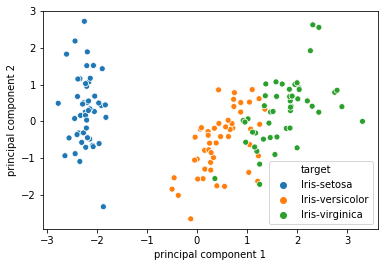

In [70]:
import seaborn as sns

sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue=df['target'])

The three classes appear to be well separated (iris-virginica and iris-versicolor could be better separated).